In [1]:
from flasher_lib import *

In [2]:
#definir variables
m=4
delta=np.pi/3.7
alpha=np.pi/2-np.pi/m
epsilon=10*np.pi/250
eta=(np.pi/m)-(epsilon/2)


In [3]:
def encontrar_indice(modulos, distancia_k):
    suma_modulos = 0
    for idx, modulo in enumerate(modulos):
        suma_modulos += modulo
        if distancia_k < suma_modulos:
            return idx
    return -1  # Si no encuentra un índice adecuado

In [4]:
import numpy as np

# Función de distancia euclidiana entre dos puntos en 2D
def e_distance(p1, p2):
    return np.linalg.norm(p2 - p1)

""" calcula todos los puntos r que caben dentro de los puntos p(i,j)"""
def r_h_cte(i, j, m, delta, alpha, epsilon, altura):
    modulos = []  # Lista para guardar las distancias euclidianas de los puntos p a lo largo de i para j dado
    resultados = []  # Lista de tuplas para guardar los índices y remanentes encontrados
    distancia_k=dk(altura, epsilon, m)
    for indice in range(i):
        distancia = e_distance(p(indice, j,  m, delta, alpha, epsilon), p(indice + 1, j,  m, delta, alpha, epsilon))
        modulos.append(distancia)
    # Calcular cuántos puntos r(i,j) se pueden crear
    puntos = np.floor(sum(modulos) / distancia_k)

    # Encontrar los índices y remanentes para los puntos r(i,j)
    for n in range(int(puntos)):
        indice = encontrar_indice(modulos, distancia_k * (n + 1))
        if indice == -1:
            break
        remanente = distancia_k * (n + 1) - sum(modulos[:indice])
        resultados.append((indice, remanente))

    return resultados

# Función que genera el punto r(i,j)
def nuevo_r(i, j, m, delta, alpha, epsilon, altura):
    # Obtener los índices y remanentes relativos para el punto r(i,j)
    resultados = r_h_cte(i, j, m, delta, alpha, epsilon, altura)

    # Inicializar el punto de partida en p(0,j)
    punto_inicial = p(0, j, m, delta, alpha, epsilon)

    # Calcular el punto r(i,j)
    punto_actual = punto_inicial  # Inicialmente en p(0,j)
    
    puntos_r=[punto_inicial]
    for idx, remanente in resultados:
        if idx >= i:
            break  # Si llegamos al punto i, no seguimos calculando más
        
        p_start = p(idx, j, m, delta, alpha, epsilon)
        p_next = p(idx + 1, j, m, delta, alpha, epsilon)

        # Calcular la dirección entre p(idx,j) y p(idx+1,j)
        direccion = (p_next - p_start) / e_distance(p_start, p_next)
        
        # Aplicar el desplazamiento basado en el remanente
        desplazamiento = remanente * direccion
        punto_actual = p_start + desplazamiento
        puntos_r.append(punto_actual)
    return puntos_r


In [5]:
punto=nuevo_r(4, 0, m, delta, alpha, epsilon, 0.5)
print(punto)

[array([1, 0]), array([1.04823788, 0.75646908]), array([1.09647576, 1.51293816]), array([1.10979328, 2.26943689]), array([1.06284007, 3.0259868 ]), array([1.01588686, 3.7825367 ]), array([0.96200432, 4.5382172 ]), array([0.8206005 , 5.28291669]), array([0.67919669, 6.02761617]), array([0.53779288, 6.77231566]), array([0.39638907, 7.51701514]), array([0.22308296, 8.25355238]), array([-0.01054144,  8.97465709]), array([-0.24416583,  9.6957618 ]), array([-0.47779023, 10.41686651]), array([-0.71141462, 11.13797122]), array([-0.94503902, 11.85907593]), array([-1.17866341, 12.58018064])]


In [6]:
def ajustar_circunferencia(points):
    # Obtener las coordenadas x e y de los puntos
    x = points[:, 0]
    y = points[:, 1]
    
    # Calcular las sumas necesarias para el método de ajuste de mínimos cuadrados
    n = len(points)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x**2)
    sum_y_squared = np.sum(y**2)
    sum_xy = np.sum(x*y)
    
    # Calcular los coeficientes del sistema de ecuaciones
    A = np.array([[sum_x_squared, sum_xy, sum_x],
                  [sum_xy, sum_y_squared, sum_y],
                  [sum_x, sum_y, n]])
    B = np.array([-np.sum(x**3 + x*y**2),
                  -np.sum(x**2*y + y**3),
                  -np.sum(x**2 + y**2)])
    
    # Resolver el sistema de ecuaciones para obtener los coeficientes de la circunferencia
    xc, yc, r = np.linalg.solve(A, B)
    
    return xc, yc, r

distancia_k = 6.064044126887753
matriz [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
punto p p(0,0) [1 0]
direcciones u(0,0) [ 0.66067472 -0.75067231]
punto p p(0,1) [6.123234e-17 1.000000e+00]
direcciones u(0,1) [0.75067231 0.66067472]
punto p p(0,2) [-1.0000000e+00  1.2246468e-16]
direcciones u(0,2) [-0.66067472  0.75067231]
punto p p(0,3) [-1.8369702e-16 -1.0000000e+00]
direcciones u(0,3) [-0.75067231 -0.66067472]
punto p p(1,0) [1.12701782 1.99190044]
direcciones u(1,0) [ 0.74954929 -0.66194853]
punto p p(1,1) [-1.99190044  1.12701782]
direcciones u(1,1) [0.66194853 0.74954929]
punto p p(1,2) [-1.12701782 -1.99190044]
direcciones u(1,2) [-0.74954929  0.66194853]
punto p p(1,3) [ 1.99190044 -1.12701782]
direcciones u(1,3) [-0.66194853 -0.74954929]
punto p p(2,0) [0.97237837 4.48358253]
direcciones u(2,0) [ 0.82660302 -0.56278543]
punto p p(2,1) [-4.48358253  0.97237837]
direcciones u(2,1) [0.56278543 0.82660302]
punto p p(2,2) [-0.9723783

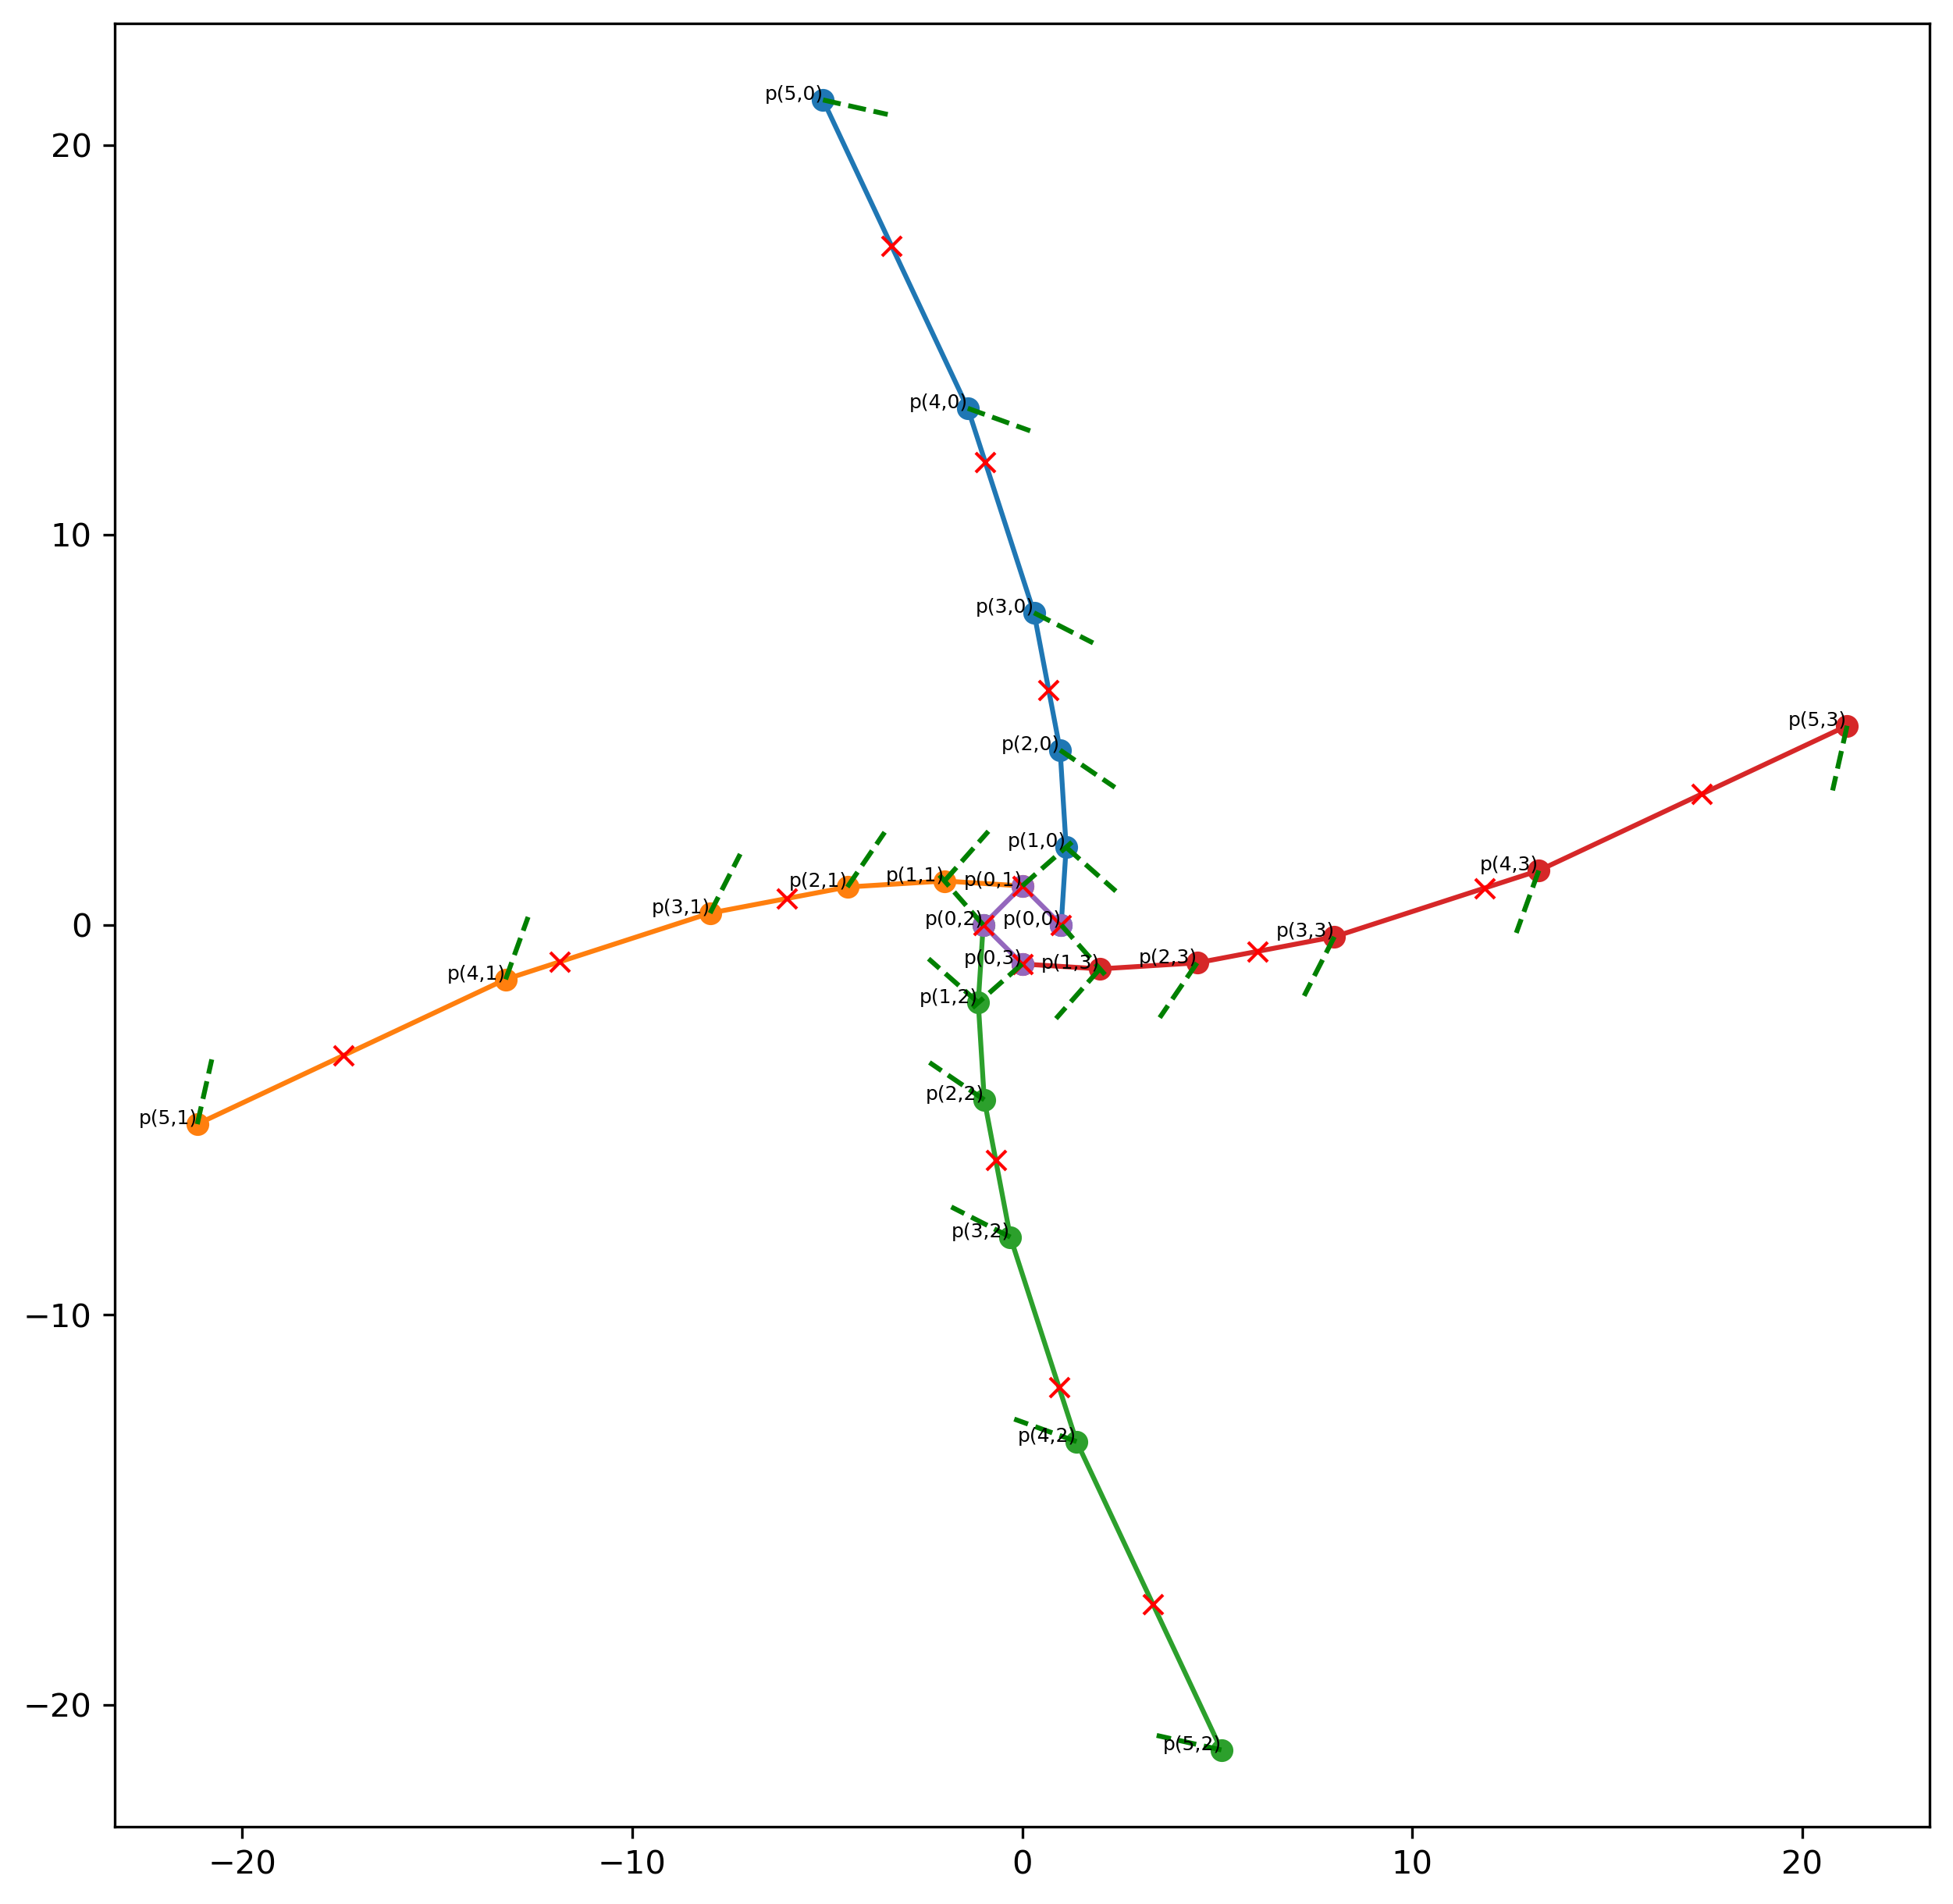

In [8]:
import matplotlib.pyplot as plt
import numpy as np

i=6
i_values = range(i)  # Cambia el rango de i si es necesario
j_values = range(m)  # Cambia el rango de j según los pliegues
j_values_centro = range(m+1)
h = 4 # Altura o algún otro parámetro
distancia_k = dk(h, epsilon, m)  # Calcular la distancia dk
print(f'distancia_k = {distancia_k}')
# Inicializar matrices para almacenar coordenadas
x_values_p = np.zeros((len(i_values), len(j_values)))
print("matriz",x_values_p)
y_values_p = np.zeros((len(i_values), len(j_values)))
# big fig and high resolution
plt.figure(figsize=(10, 10), dpi=300)
# Rellenar matrices con los puntos generados por p(i,j)
for i in i_values:
    for j in j_values:
        punto_p = p(i, j, m, delta, alpha, epsilon)  # Generar punto p(i,j)
        x_values_p[i, j] = punto_p[0]
        y_values_p[i, j] = punto_p[1]
        # Etiquetar los puntos
        plt.text(x_values_p[i, j], y_values_p[i, j], f'p({i},{j})', fontsize=6, ha='right')

# Graficar y conectar los puntos por j
for j in j_values:
    plt.plot(x_values_p[:, j], y_values_p[:, j], 'o-', label=f'j={j}')

# Graficar los puntos con i=0 (primer pliegue)
plt.plot(x_values_p[0, :], y_values_p[0, :], 'o-', label='i=0')

puntos_graficados = []  # Lista para almacenar los puntos r(i,j) ya graficados
for j in j_values: 
    punto_r = nuevo_r(i, j, m, delta, alpha, epsilon, h)
    punto_r_array = np.array(punto_r)
    direccion_rho = rho(i, j, 0, delta, alpha, eta, epsilon, m)
    u_rho = u(direccion_rho)
    longitud = 2

    direccion_rho_scaled = u_rho * longitud
    plt.plot(punto_r_array[:, 0], punto_r_array[:, 1], 'rx')

   

line_length = 1.7  # Factor de escala para la longitud de las líneas
for i in i_values:
    for j in j_values:
        punto_p = p(i, j, m, delta, alpha, epsilon)  # Obtener el punto p(i,j)
        direccion_phi = phi(i, j, delta, epsilon, m)  # Obtener la dirección phi
        direccion_u = u(direccion_phi)  # Convertir la dirección a un vector unitario
        print("punto p", f'p({i},{j})', punto_p)
        print("direcciones", f'u({i},{j})', direccion_u)

        # Escalar el vector unitario
        direccion_u_scaled = direccion_u * line_length
        
        # Graficar línea de la dirección desde el punto p(i,j)
        plt.plot([punto_p[0], punto_p[0] + direccion_u_scaled[0]], 
                 [punto_p[1], punto_p[1] + direccion_u_scaled[1]], 'g--')  # Línea verde discontinua

# Ajustes de visualización
plt.axis('equal')  # Mantener proporciones
#plt.legend()  # Mostrar leyendas
plt.show()